In [81]:
import json
import requests
from pprint import pprint
# from config import api_key
from pygments import highlight, lexers, formatters
import pandas as pd
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import scipy.stats as st
import gmaps
import gmaps.datasets
import gmaps.geojson_geometries

gmaps.configure(api_key='')

# gmaps.configure(api_key = api_key)

In [82]:
## Data from https://rapidapi.com/

# make a call to the URL 
url = "https://corona-virus-world-and-india-data.p.rapidapi.com/api"

# pass key and host login
headers = {
    'x-rapidapi-host': "corona-virus-world-and-india-data.p.rapidapi.com",
    'x-rapidapi-key': ""
    }

# Store the information from the GET call into the "response" variable

response = requests.request("GET", url, headers=headers)
pprint(response.json())
results = response.json()
# convert JSON into a python dictorinary format in order to read/loop through it.
# results = response.json()

# Print result to confirm
# pprint(results["countries_stat"])

# create for loop to get each result from countries stat which is the main key of the JSON
for key in results["countries_stat"]:
    print(key["country_name"])
    
    

{'countries_stat': [{'active_cases': '762,083',
                     'cases': '903,298',
                     'country_name': 'USA',
                     'deaths': '50,954',
                     'deaths_per_1m_population': '154',
                     'new_cases': '16,856',
                     'new_deaths': '718',
                     'region': '',
                     'serious_critical': '14,932',
                     'tests_per_1m_population': '14,808',
                     'total_cases_per_1m_population': '2,729',
                     'total_recovered': '90,261',
                     'total_tests': '4,901,543'},
                    {'active_cases': '104,885',
                     'cases': '219,764',
                     'country_name': 'Spain',
                     'deaths': '22,524',
                     'deaths_per_1m_population': '482',
                     'new_cases': '6,740',
                     'new_deaths': '367',
                     'region': '',
                     'ser

                    {'active_cases': '1,120',
                     'cases': '1,351',
                     'country_name': 'Afghanistan',
                     'deaths': '43',
                     'deaths_per_1m_population': '1',
                     'new_cases': '72',
                     'new_deaths': '1',
                     'region': '',
                     'serious_critical': '7',
                     'tests_per_1m_population': '165',
                     'total_cases_per_1m_population': '35',
                     'total_recovered': '188',
                     'total_tests': '6,422'},
                    {'active_cases': '932',
                     'cases': '1,326',
                     'country_name': 'North Macedonia',
                     'deaths': '57',
                     'deaths_per_1m_population': '27',
                     'new_cases': '26',
                     'new_deaths': '1',
                     'region': '',
                     'serious_critical': '14',
          

                    {'active_cases': '4',
                     'cases': '133',
                     'country_name': 'Gibraltar',
                     'deaths': '0',
                     'deaths_per_1m_population': '0',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_population': '61,203',
                     'total_cases_per_1m_population': '3,948',
                     'total_recovered': '129',
                     'total_tests': '2,062'},
                    {'active_cases': '12',
                     'cases': '122',
                     'country_name': 'Cambodia',
                     'deaths': '0',
                     'deaths_per_1m_population': '0',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '1',
                     'tests_

                    {'active_cases': '4',
                     'cases': '7',
                     'country_name': 'Bhutan',
                     'deaths': '0',
                     'deaths_per_1m_population': '0',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_population': '11,603',
                     'total_cases_per_1m_population': '9',
                     'total_recovered': '3',
                     'total_tests': '8,953'},
                    {'active_cases': '0',
                     'cases': '7',
                     'country_name': 'Mauritania',
                     'deaths': '1',
                     'deaths_per_1m_population': '0.2',
                     'new_cases': '0',
                     'new_deaths': '0',
                     'region': '',
                     'serious_critical': '0',
                     'tests_per_1m_pop

In [83]:

# print(results["countries_stat"])

In [84]:
# create a DataFrame from scratch (temporary to test)
pd.DataFrame(columns=["country_name"])

# create variable to hold the value belonging to each key in the dataset
countries = []
cases = []
deaths = []
active_cases = []
new_cases = []
new_deaths = []
total_recovered = []
serious_critical = []
deaths_per_1m_population = []
total_cases_per_1m_population = []

# total_tests = []

# for loop to store the data for each key
for key in results["countries_stat"]:
    countries.append(key["country_name"])
    cases.append(key["cases"])
    deaths.append(key["deaths"])
    new_deaths.append(key["new_deaths"])
    new_cases.append(key["new_cases"])
    active_cases.append(key["active_cases"])
    total_recovered.append(key["total_recovered"])
    serious_critical.append(key["serious_critical"])
    deaths_per_1m_population.append(key["deaths_per_1m_population"])
    total_cases_per_1m_population.append(key["total_cases_per_1m_population"])
    #total_tests.append(key["total_tests"])
    
# print(countries)

In [85]:
# Store dataframe into variable permanent

data = pd.DataFrame(columns=["Country", "Total Cases", "Total Deaths", "New Deaths", "New Cases", "Active Cases", "Total Recovered", "Serious Critical", "Deaths Per 1m_population", "Total Cases Per 1m_population"])
data["Country"] = countries
data["Total Cases"] = cases
data["Total Deaths"] = deaths
data["New Deaths"] = new_deaths
data["New Cases"] = new_cases
data["Active Cases"] = active_cases
data["Total Recovered"] = total_recovered
data["Serious Critical"] = serious_critical
data["Deaths Per 1m_population"] = deaths_per_1m_population
data["Total Cases Per 1m_population"] = total_cases_per_1m_population
# data['Total tests'] = total_tests
data.head(10)


,Country,Total Cases,Total Deaths,New Deaths,New Cases,Active Cases,Total Recovered,Serious Critical,Deaths Per 1m_population,Total Cases Per 1m_population
0,USA,"903,298","50,954",718,"16,856","762,083","90,261","14,932",154,"2,729"
1,Spain,"219,764","22,524",367,"6,740","104,885","92,355","7,705",482,"4,700"
2,Italy,"192,994","25,969",420,"3,021","106,527","60,498","2,173",430,"3,192"
3,France,"159,828","22,245",389,"1,645","94,090","43,493","4,870",341,"2,449"
4,Germany,"154,159","5,653",78,"1,030","41,706","106,800","2,908",67,"1,840"
5,UK,"143,464","19,506",768,"5,386","123,614",N/A,"1,559",287,"2,113"
6,Turkey,"104,912","2,600",109,"3,122","80,575","21,737","1,790",31,"1,244"
7,Iran,"88,194","5,574",93,"1,168","16,021","66,599","3,121",66,"1,050"
8,China,"82,804","4,632",0,6,915,"77,257",57,3,58
9,Russia,"68,622",615,60,"5,849","62,439","5,568","2,300",4,470


In [86]:
# use 06-Python-APIs/3/Activities/10-Stu_BankDeserts_Heatmap/Solved/Banking_Desert_HeatMap.ipynb
# for heatmap and plot chart

In [87]:

data["Total Deaths"] = data["Total Deaths"].str.replace("N/A","0")
data["Total Deaths"] = data["Total Deaths"].str.replace(",","").astype(float)
data.sort_values(['Total Deaths'], axis=0, ascending=False, inplace=True)
deaths_df = data[["Country","Total Deaths"]]
deaths_df.reset_index(inplace=True)

deaths_df.iloc[0:20]


,index,Country,Total Deaths
0,0,USA,50954.0
1,2,Italy,25969.0
2,1,Spain,22524.0
3,3,France,22245.0
4,5,UK,19506.0
5,11,Belgium,6679.0
6,4,Germany,5653.0
7,7,Iran,5574.0
8,8,China,4632.0
9,13,Netherlands,4289.0


<IPython.core.display.Javascript object>


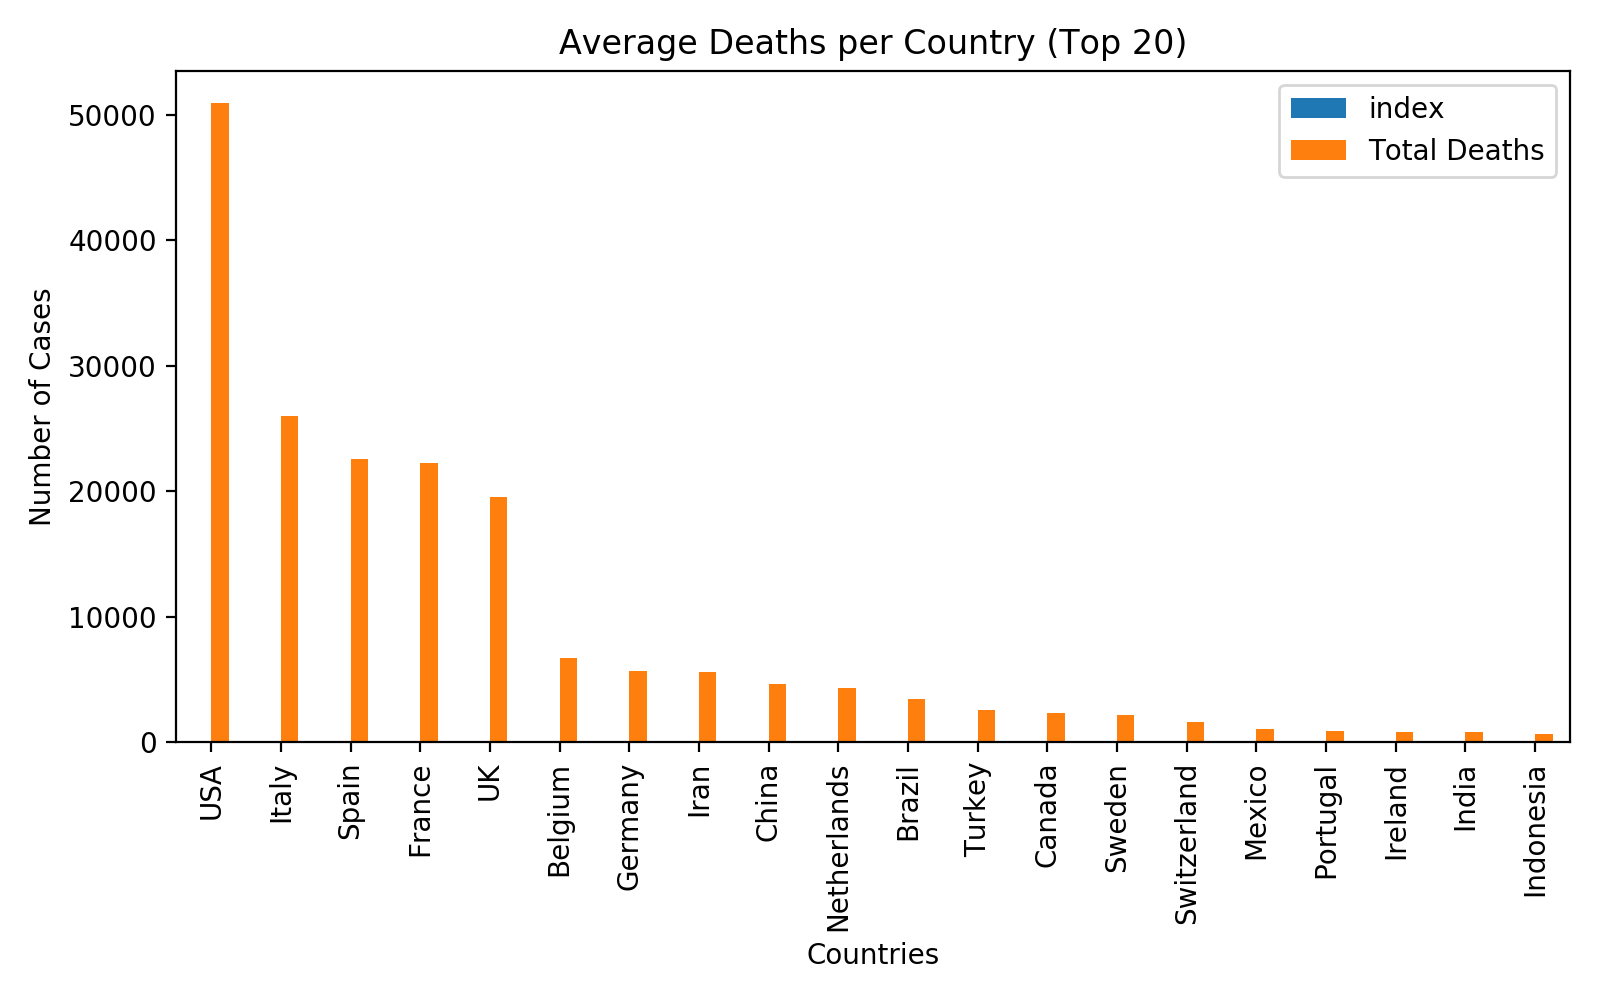

In [88]:
#Death comparision between countries
toptwenty = deaths_df.iloc[0:20]
toptwenty.plot(kind="bar", figsize=(8,5))
x_axis = np.arange(len(toptwenty))
tick_locations = [value for value in x_axis]
# Set a title for the chart
plt.title("Average Deaths per Country (Top 20)")
plt.xticks(tick_locations, data["Country"], rotation="vertical")
plt.ylabel("Number of Cases")
plt.xlabel("Countries")
plt.show()
plt.tight_layout()
plt.savefig('deathsCompare')

In [89]:
data["Total Cases"] = data["Total Cases"].str.replace("N/A","0")
data["Total Cases"] = data["Total Cases"].str.replace(",","").astype(float)
data["Active Cases"] = data["Active Cases"].str.replace("N/A","0")
data["Active Cases"] = data["Active Cases"].str.replace(",","").astype(float)
data.dtypes



Country                           object
Total Cases                      float64
Total Deaths                     float64
New Deaths                        object
New Cases                         object
Active Cases                     float64
Total Recovered                   object
Serious Critical                  object
Deaths Per 1m_population          object
Total Cases Per 1m_population     object
dtype: object

In [90]:
total_cases = data[["Country", "Total Cases","Active Cases"]]

world_avg = total_cases.mean()
print(world_avg)

Total Cases     13147.924883
Active Cases     8587.910798
dtype: float64


<IPython.core.display.Javascript object>


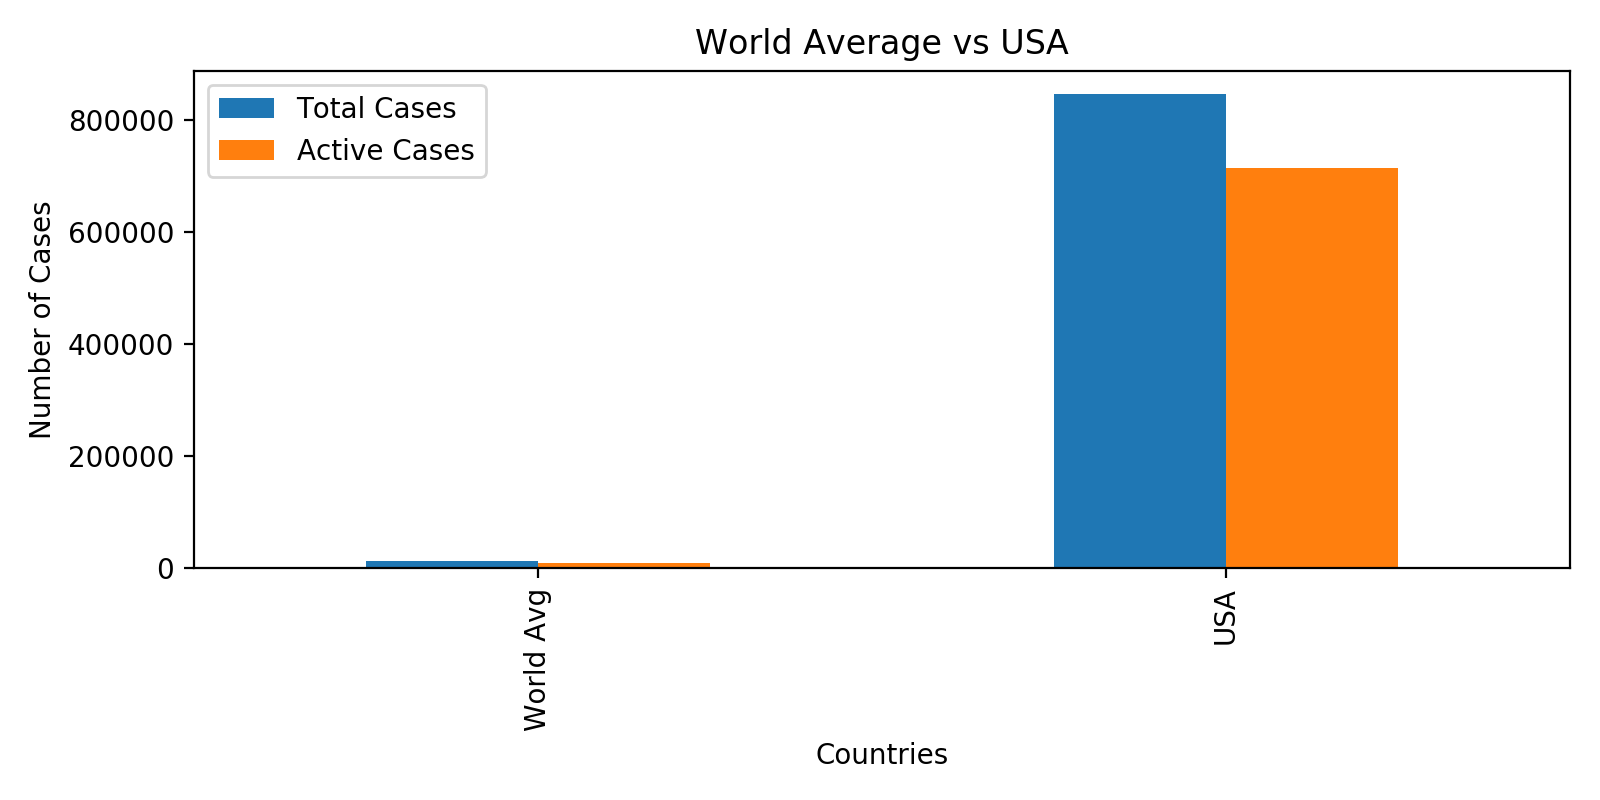

In [91]:
total_cases.head()
frame_df = pd.DataFrame({
    "Countries": ["World Avg", "USA"],
    "Total Cases": [12357.065728, 845822.0],
    "Active Cases": [8125.807512, 714426.0]
})
frame_df.set_index("Countries",drop=True,inplace=True)
frame_df
frame_df.plot(kind="bar", figsize=(8,4))
plt.title("World Average vs USA")
plt.ylabel("Number of Cases")
plt.xlabel("Countries")
plt.show()
plt.tight_layout()
plt.savefig('WorldAvgvsUS')

